In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
from google.cloud import bigquery

bqclient = bigquery.Client()

query = """
select *
from
`dml-test-276409.Crew_ML_Space.Crew_ML_RawDataset`
"""

rawdataset = bqclient.query(query).to_dataframe()

In [5]:
rawdataset.head()

,FEATURE_DOB,FEATURE_DateJoined,FEATURE_Seniority,FEATURE_PairingLabel,FEATURE_DutyStartDateTime,FEATURE_DutyStartHour,FEATURE_DutyDayOfWeek,LABEL_Swapped,FEATURE_Swapped_Count,FEATURE_Rostered_Count,FEATURE_WithCrew1_Rostered_Count,FEATURE_WithCrew2_Rostered_Count,FEATURE_WithCrew3_Rostered_Count,FEATURE_WithCrew4_Rostered_Count,FEATURE_WithCrew5_Rostered_Count,FEATURE_WithCrew1_Swapped_Count,FEATURE_WithCrew2_Swapped_Count,FEATURE_WithCrew3_Swapped_Count,FEATURE_WithCrew4_Swapped_Count,FEATURE_WithCrew5_Swapped_Count
0,1992-09-20 16:00:00+00:00,2017-08-10 16:00:00+00:00,NaN,172,2019-01-29 15:40:00+00:00,15,3,False,22,240,9,3,1,1,4,0,1,0,0,1
1,1995-03-09 16:00:00+00:00,2017-06-13 16:00:00+00:00,NaN,172,2019-01-29 15:40:00+00:00,15,3,True,23,220,5,4,2,4,3,2,1,1,2,1
2,1991-09-01 16:00:00+00:00,2017-06-13 16:00:00+00:00,NaN,834,2019-01-06 20:45:00+00:00,20,1,False,41,241,3,1,1,2,1,0,0,0,0,0
3,1992-01-18 16:00:00+00:00,2018-04-10 16:00:00+00:00,NaN,834,2019-01-06 20:45:00+00:00,20,1,False,4,138,1,1,1,2,2,0,0,0,0,0
4,1993-11-29 16:00:00+00:00,2014-10-27 16:00:00+00:00,1.0,614,2019-01-20 06:30:00+00:00,6,1,False,10,192,1,1,2,1,2,0,0,0,0,0


In [6]:
rawdataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112169 entries, 0 to 112168
Data columns (total 20 columns):
 #   Column                            Non-Null Count   Dtype              
---  ------                            --------------   -----              
 0   FEATURE_DOB                       112165 non-null  datetime64[ns, UTC]
 1   FEATURE_DateJoined                112165 non-null  datetime64[ns, UTC]
 2   FEATURE_Seniority                 51449 non-null   float64            
 3   FEATURE_PairingLabel              112169 non-null  object             
 4   FEATURE_DutyStartDateTime         112169 non-null  datetime64[ns, UTC]
 5   FEATURE_DutyStartHour             112169 non-null  int64              
 6   FEATURE_DutyDayOfWeek             112169 non-null  int64              
 7   LABEL_Swapped                     112169 non-null  bool               
 8   FEATURE_Swapped_Count             112169 non-null  int64              
 9   FEATURE_Rostered_Count            112169 non-nul

<AxesSubplot:xlabel='LABEL_Swapped', ylabel='count'>

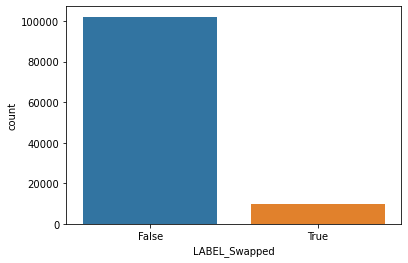

In [7]:
sns.countplot(x='LABEL_Swapped',data=rawdataset)

<AxesSubplot:>

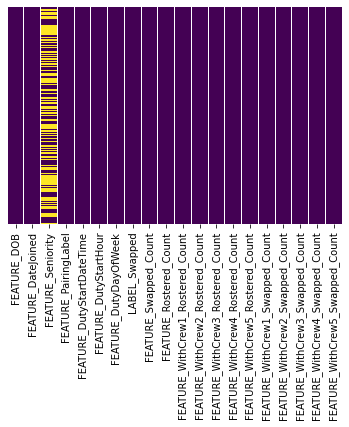

In [8]:
sns.heatmap(rawdataset.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [9]:
# Look for and remove null values, they will lead to errors if fed into the model
rawdataset.isnull().sum()

FEATURE_DOB                             4
FEATURE_DateJoined                      4
FEATURE_Seniority                   60720
FEATURE_PairingLabel                    0
FEATURE_DutyStartDateTime               0
FEATURE_DutyStartHour                   0
FEATURE_DutyDayOfWeek                   0
LABEL_Swapped                           0
FEATURE_Swapped_Count                   0
FEATURE_Rostered_Count                  0
FEATURE_WithCrew1_Rostered_Count        0
FEATURE_WithCrew2_Rostered_Count        0
FEATURE_WithCrew3_Rostered_Count        0
FEATURE_WithCrew4_Rostered_Count        0
FEATURE_WithCrew5_Rostered_Count        0
FEATURE_WithCrew1_Swapped_Count         0
FEATURE_WithCrew2_Swapped_Count         0
FEATURE_WithCrew3_Swapped_Count         0
FEATURE_WithCrew4_Swapped_Count         0
FEATURE_WithCrew5_Swapped_Count         0
dtype: int64

In [10]:
traindataset = rawdataset.drop(columns='FEATURE_Seniority')

In [11]:
traindataset.dropna(subset=['FEATURE_DOB','FEATURE_DateJoined'], inplace=True)

In [12]:
traindataset.isnull().sum()

FEATURE_DOB                         0
FEATURE_DateJoined                  0
FEATURE_PairingLabel                0
FEATURE_DutyStartDateTime           0
FEATURE_DutyStartHour               0
FEATURE_DutyDayOfWeek               0
LABEL_Swapped                       0
FEATURE_Swapped_Count               0
FEATURE_Rostered_Count              0
FEATURE_WithCrew1_Rostered_Count    0
FEATURE_WithCrew2_Rostered_Count    0
FEATURE_WithCrew3_Rostered_Count    0
FEATURE_WithCrew4_Rostered_Count    0
FEATURE_WithCrew5_Rostered_Count    0
FEATURE_WithCrew1_Swapped_Count     0
FEATURE_WithCrew2_Swapped_Count     0
FEATURE_WithCrew3_Swapped_Count     0
FEATURE_WithCrew4_Swapped_Count     0
FEATURE_WithCrew5_Swapped_Count     0
dtype: int64

In [13]:
# Convert Date of Birth to Age (in Days), model can only interpret numerical values so feeding DOB into it does not work

from datetime import date

traindataset['FEATURE_Age'] = traindataset['FEATURE_DutyStartDateTime'] - traindataset['FEATURE_DOB']
traindataset['FEATURE_Age'] = traindataset['FEATURE_Age'].dt.days / 365
traindataset['FEATURE_Age']

0         26.372603
1         23.906849
2         27.367123
3         26.986301
4         25.156164
            ...    
112164    29.079452
112165    26.279452
112166    40.745205
112167    30.131507
112168    25.073973
Name: FEATURE_Age, Length: 112165, dtype: float64

In [14]:
# Convert Date of Joining into Tenure (in days)
traindataset['FEATURE_Tenure'] = traindataset['FEATURE_DutyStartDateTime'] - traindataset['FEATURE_DateJoined']
traindataset['FEATURE_Tenure'] = traindataset['FEATURE_Tenure'].dt.days / 365
traindataset['FEATURE_Tenure']

0         1.468493
1         1.627397
2         1.567123
3         0.742466
4         4.232877
            ...   
112164    4.947945
112165    3.254795
112166    3.389041
112167    1.449315
112168    1.449315
Name: FEATURE_Tenure, Length: 112165, dtype: float64

In [15]:
traindataset = traindataset.drop(columns=['FEATURE_DOB','FEATURE_DateJoined','FEATURE_DutyStartDateTime'])

In [16]:
traindataset.head()

,FEATURE_PairingLabel,FEATURE_DutyStartHour,FEATURE_DutyDayOfWeek,LABEL_Swapped,FEATURE_Swapped_Count,FEATURE_Rostered_Count,FEATURE_WithCrew1_Rostered_Count,FEATURE_WithCrew2_Rostered_Count,FEATURE_WithCrew3_Rostered_Count,FEATURE_WithCrew4_Rostered_Count,FEATURE_WithCrew5_Rostered_Count,FEATURE_WithCrew1_Swapped_Count,FEATURE_WithCrew2_Swapped_Count,FEATURE_WithCrew3_Swapped_Count,FEATURE_WithCrew4_Swapped_Count,FEATURE_WithCrew5_Swapped_Count,FEATURE_Age,FEATURE_Tenure
0,172,15,3,False,22,240,9,3,1,1,4,0,1,0,0,1,26.372603,1.468493
1,172,15,3,True,23,220,5,4,2,4,3,2,1,1,2,1,23.906849,1.627397
2,834,20,1,False,41,241,3,1,1,2,1,0,0,0,0,0,27.367123,1.567123
3,834,20,1,False,4,138,1,1,1,2,2,0,0,0,0,0,26.986301,0.742466
4,614,6,1,False,10,192,1,1,2,1,2,0,0,0,0,0,25.156164,4.232877


In [17]:
# Converting non-numerical features into dummy columns
pairinglabel = pd.get_dummies(traindataset['FEATURE_PairingLabel'], prefix='p_', drop_first=True)
pairinglabel.head()

,p__122B,p__130,p__130B,p__140,p__160,p__166,p__166B,p__172,p__180,p__180B,...,p__862,p__862B,p__870,p__870B,p__890,p__898,p__898B,p__9462,p__9464,p__9988
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
dayofweek = pd.get_dummies(traindataset['FEATURE_DutyDayOfWeek'], prefix='dow', drop_first=True)
dayofweek.head()

,dow_2,dow_3,dow_4,dow_5,dow_6,dow_7
0,0,1,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0


In [19]:
dutyhour = pd.get_dummies(traindataset['FEATURE_DutyStartHour'], prefix='hr_', drop_first=True)
dutyhour.head()

,hr__1,hr__2,hr__3,hr__4,hr__5,hr__6,hr__7,hr__8,hr__9,hr__10,...,hr__14,hr__15,hr__16,hr__17,hr__18,hr__19,hr__20,hr__21,hr__22,hr__23
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
traindataset = pd.concat([traindataset,pairinglabel,dayofweek,dutyhour],axis=1)

In [21]:
traindataset.drop(['FEATURE_PairingLabel','FEATURE_DutyDayOfWeek','FEATURE_DutyStartHour'], axis=1, inplace=True)

In [22]:
traindataset.head()

,LABEL_Swapped,FEATURE_Swapped_Count,FEATURE_Rostered_Count,FEATURE_WithCrew1_Rostered_Count,FEATURE_WithCrew2_Rostered_Count,FEATURE_WithCrew3_Rostered_Count,FEATURE_WithCrew4_Rostered_Count,FEATURE_WithCrew5_Rostered_Count,FEATURE_WithCrew1_Swapped_Count,FEATURE_WithCrew2_Swapped_Count,...,hr__14,hr__15,hr__16,hr__17,hr__18,hr__19,hr__20,hr__21,hr__22,hr__23
0,False,22,240,9,3,1,1,4,0,1,...,0,1,0,0,0,0,0,0,0,0
1,True,23,220,5,4,2,4,3,2,1,...,0,1,0,0,0,0,0,0,0,0
2,False,41,241,3,1,1,2,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,False,4,138,1,1,1,2,2,0,0,...,0,0,0,0,0,0,1,0,0,0
4,False,10,192,1,1,2,1,2,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
# Finally, converting the label column from boolean to 0,1 values
traindataset['LABEL_Swapped'] = traindataset['LABEL_Swapped'] * 1
traindataset['LABEL_Swapped']

0         0
1         1
2         0
3         0
4         0
         ..
112164    0
112165    0
112166    0
112167    0
112168    0
Name: LABEL_Swapped, Length: 112165, dtype: int64

In [24]:
traindataset.isnull().sum()

LABEL_Swapped                       0
FEATURE_Swapped_Count               0
FEATURE_Rostered_Count              0
FEATURE_WithCrew1_Rostered_Count    0
FEATURE_WithCrew2_Rostered_Count    0
                                   ..
hr__19                              0
hr__20                              0
hr__21                              0
hr__22                              0
hr__23                              0
Length: 176, dtype: int64

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(traindataset.drop('LABEL_Swapped', axis=1), traindataset['LABEL_Swapped'].astype('int'), test_size=0.25, random_state=101)

In [27]:
# Logictic Regression Model
from sklearn.linear_model import LogisticRegression

In [28]:
logmodel = LogisticRegression(max_iter = 1000)
logmodel.fit(X_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(max_iter=1000)

In [29]:
log_predictions = logmodel.predict(X_test)

In [30]:
from sklearn.metrics import classification_report, confusion_matrix

In [31]:
print(classification_report(y_test,log_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25486
           1       0.97      0.97      0.97      2556

    accuracy                           0.99     28042
   macro avg       0.98      0.98      0.98     28042
weighted avg       0.99      0.99      0.99     28042



In [32]:
print(confusion_matrix(y_test,log_predictions))

[[25412    74]
 [   82  2474]]


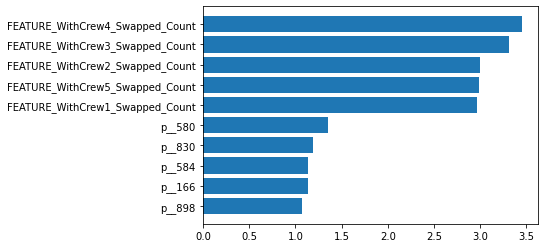

In [76]:
importance = logmodel.coef_[0]

# Top 10 features
top_col_name = X_train.columns[sorted(range(len(logmodel.coef_[0])), key=lambda i: logmodel.coef_[0][i])[-10:]]
top_importance = importance[sorted(range(len(logmodel.coef_[0])), key=lambda i: logmodel.coef_[0][i])[-10:]]

plt.barh(top_col_name, top_importance)
plt.show()

## https://machinelearningmastery.com/calculate-feature-importance-with-python/ ##

In [31]:
# K Nearest Neighbors Model
from sklearn.neighbors import KNeighborsClassifier

In [32]:
knn = KNeighborsClassifier(n_neighbors = 10)

In [33]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [34]:
knn_predictions = knn.predict(X_test)

In [35]:
print(classification_report(y_test,knn_predictions))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97     25486
           1       0.97      0.43      0.59      2556

    accuracy                           0.95     28042
   macro avg       0.96      0.71      0.78     28042
weighted avg       0.95      0.95      0.94     28042



In [36]:
print(confusion_matrix(y_test,knn_predictions))

[[25447    39]
 [ 1460  1096]]


In [37]:
# Finding optimal K values
error_rate = []

for i in range(1,15):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

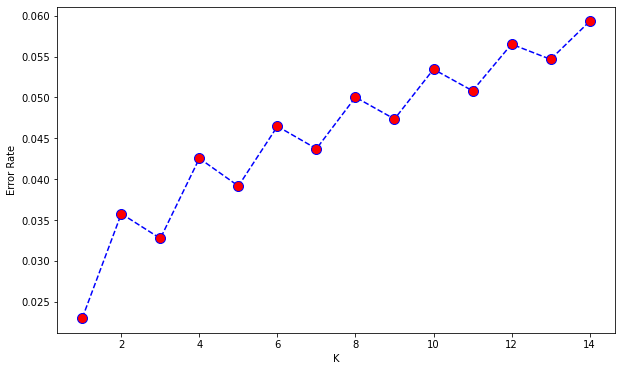

In [38]:
plt.figure(figsize=(10,6))
plt.plot(range(1,15),error_rate,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.xlabel('K')
plt.ylabel('Error Rate')

In [39]:
knn = KNeighborsClassifier(n_neighbors = 1)

In [40]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [41]:
knn_predictions = knn.predict(X_test)

In [42]:
print(classification_report(y_test,knn_predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     25486
           1       0.93      0.81      0.87      2556

    accuracy                           0.98     28042
   macro avg       0.95      0.90      0.93     28042
weighted avg       0.98      0.98      0.98     28042



In [43]:
print(confusion_matrix(y_test,log_predictions))

[[25412    74]
 [   82  2474]]
